### CUSTOMER CHURN PREDICTION OF SYRIATEL COMPANY

Author:Winny Chepkoech

### Data understanding 
This will help is acquire knowledge and comprehension of our data before analysing and modelling

In [23]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay,classification_report, accuracy_score,confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV

#ignore warnings
warnings.filterwarnings("ignore")


In [24]:
#reading the csv file to check the data
syraitel_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
syraitel_df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
# checking data shape
syraitel_df.shape

(3333, 21)

In [26]:
#checking data information
syraitel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- our dataset contains 16 numerical columns (integers and floats) and 4 categorical columns (including states and service plans) with a boolean column for churn status.
- since some columns on our dataset is not important hence we are going to drop them


In [27]:
# dropping irrelevent columns 
syraitel_df = syraitel_df.drop(columns= ["phone number", "account length", "area code"], axis=1)
syraitel_df.head()



,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
#separating numerical and categorical columns for easy analysis on our data
categorical_df = syraitel_df[["state", "international plan","voice mail plan", "churn"]]
numerical_df = syraitel_df[['number vmail messages',
    'total day minutes','total day calls','total day charge',
'total eve minutes','total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
  'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']]

### checking for duplicates and NaN values


In [30]:
# checking duplicates 
syraitel_df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

- As seen from our data their is no duplicates hence we further check the misising values


In [31]:
#checking for missing values
syraitel_df.isna().sum()

state                     0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

- From the checklist we have no missing values, hence we clean our data for further analysis


## Exploratory Data Analysis

In [32]:
#analysing basic statistics of our datset
syraitel_df.describe()


,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


-  The summary gives us a foundational understanding of our datasets ditribution on central tendency and variability, aiding in better data cleaning, preparation, and modeling strategies.

## Univariate Analysis

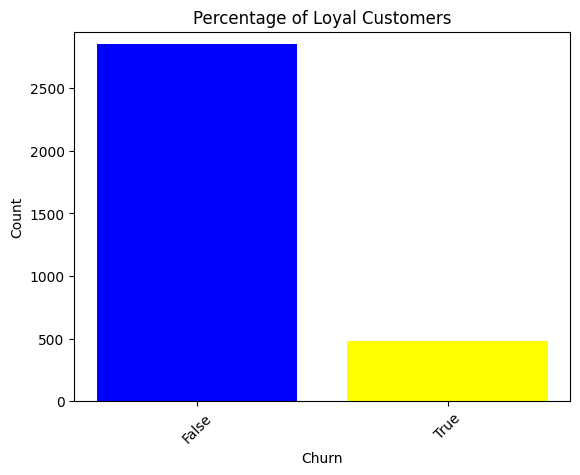

In [36]:
#checking the percentage of loyal customers by visualization
churn_counts = syraitel_df['churn'].replace({0: 'False', 1: 'True'}).value_counts()

#calculating the percentage of loyal customers 
loyal_percentage = churn_counts.get('False', 0) / sum(churn_counts) * 100
# Plot the bar chart with the correct labels
plt.bar(['False', 'True'], churn_counts.values, color=['blue', 'yellow'], tick_label=['False', 'True'])
plt.title('Percentage of Loyal Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(churn_counts) + 100)
# Display loyal percentage only if 'False' exists in churn_counts
if 'False' in churn_counts:
    plt.text(0, max(churn_counts) + 50, f'Loyal Percentage: {loyal_percentage:.2f}%')
plt.show()

- From above visualization we can see that higher percentage of customers in the dataset did not churn, indicating good customer retention.

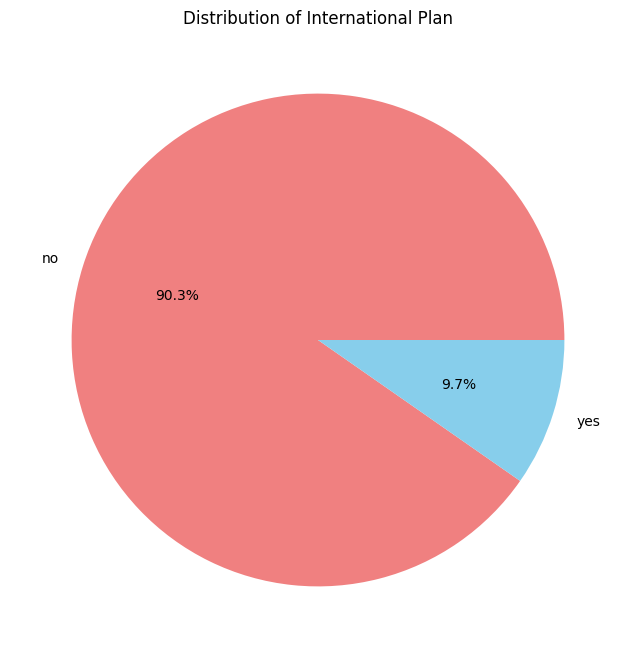

In [40]:
# Counting the occurrences of each category in 'international plan'
intl_plan_counts = syraitel_df['international plan'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(intl_plan_counts, labels=intl_plan_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribution of International Plan')
plt.show()

- The pie chart shows that majority of customers do not have an international plan, with a significantly larger portion of the chart  which is `90.3%` representing those without it. Therefore indicating that the international plan is less popular among the customer base in syriatel Company.

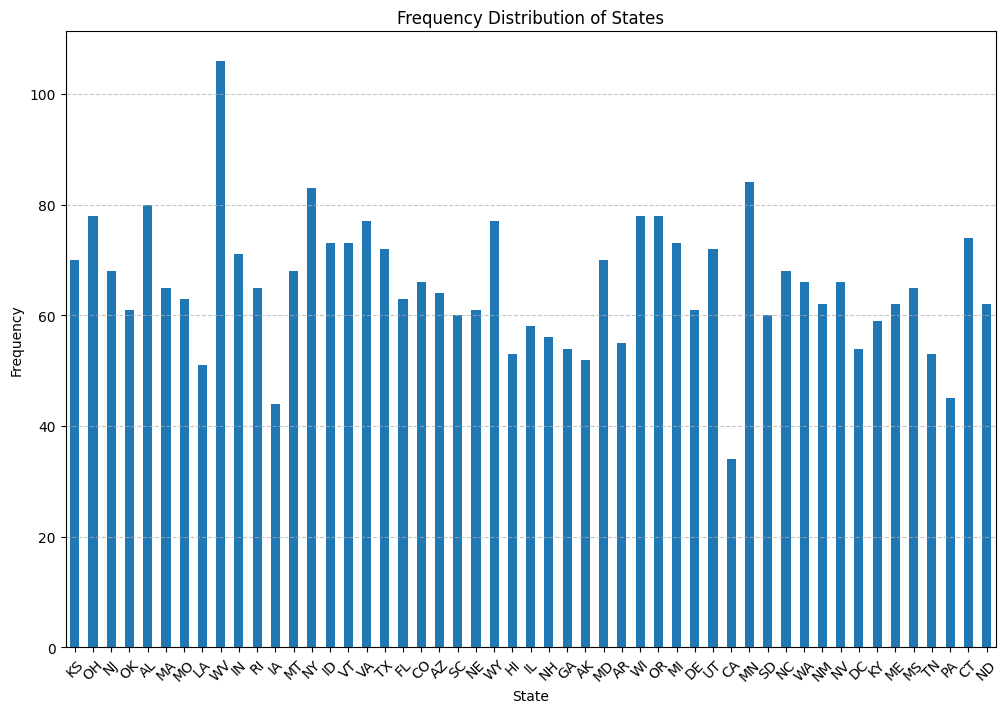

In [42]:
# Calculate frequency of each state
state_counts = syraitel_df['state'].value_counts()

# To keep the order as in the original data, use the order from the unique values
state_order = pd.Categorical(syraitel_df['state'], categories=syraitel_df['state'].unique())

# Create the plot
plt.figure(figsize=(12, 8))
state_counts = state_counts[state_order.categories]  # Reorder state_counts to match the original order
state_counts.plot(kind='bar')
plt.title('Frequency Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- `WV` is the highest state with the highest frequency while `CA` has the smallest frequency.
- `WV` which is the state of Western Virginia.
- `CA` which is the state of carlifonia.


## Multivariate Analysis

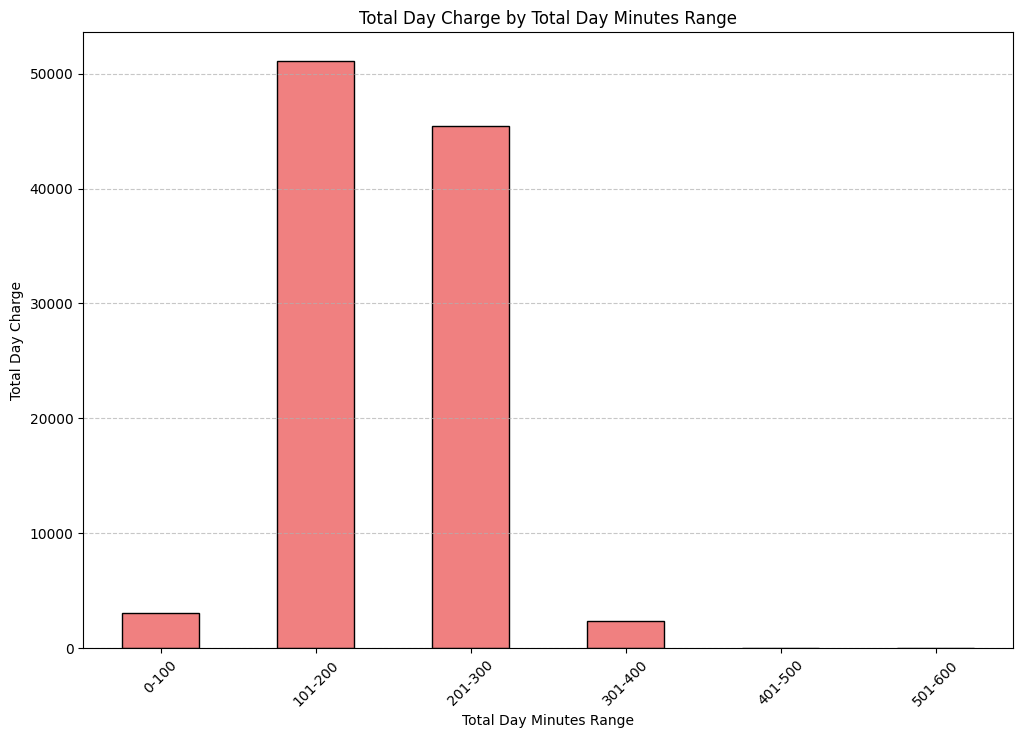

In [62]:
# Define ranges for total day minutes
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600']

# Create a new column for the minute ranges
syraitel_df['minutes_range'] = pd.cut(syraitel_df['total day minutes'], bins=bins, labels=labels, right=False)

# Calculate total day charge for each range
total_charge = syraitel_df.groupby('minutes_range')['total day charge'].sum()

# Plotting
plt.figure(figsize=(12, 8))
total_charge.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Day Charge by Total Day Minutes Range')
plt.xlabel('Total Day Minutes Range')
plt.ylabel('Total Day Charge')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- `Highest Charges:` The `101-200` minute range has the highest total day charges, indicating it's the most common usage category among customers.
- `Lower Charges:` The `0-100` minute range shows the lowest total day charges, and charges for usage above `401` minutes also decrease, possibly due to pricing strategies or caps.

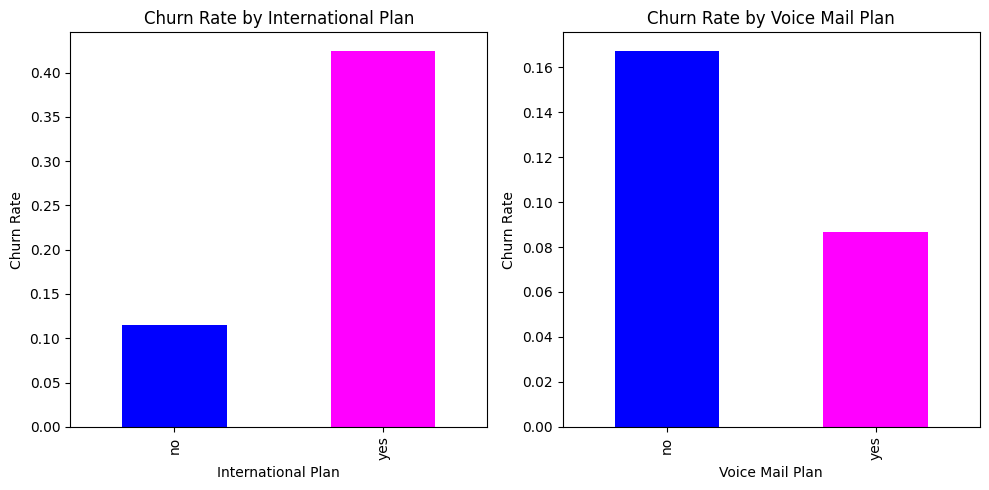

In [64]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
syraitel_df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'magenta'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
syraitel_df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'magenta'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

- `Voice Mail Plan Subscribers` has lower churn rate indicates higher customer loyalty.
- `International Plan Subscribers` has Hhigher churn rate suggests dissatisfaction and a higher likelihood of switching.
- `Customer Preference `: Voice Mail plan is preferred over the International Plan based on lower churn and higher satisfaction.